# Characteristics and skill sets required as put in the job postings

In [47]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('data job posts.csv')
df.head(2)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False


In [3]:
df = df.drop_duplicates(['RequiredQual'])
print(df.shape)

(16689, 24)


In [4]:
df["RequiredQual"].head()

0    To perform this job successfully, an\nindividu...
1    - Bachelor's Degree; Master's is preferred;\n-...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [6]:
df["RequiredQual"] = df["RequiredQual"].astype(str)

In [7]:
df['RequiredQual_token'] = df['RequiredQual'].map(word_tokenize)

In [8]:
df.RequiredQual_token.head()

0    [To, perform, this, job, successfully, ,, an, ...
1    [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
2    [-, Degree, in, environmentally, related, fiel...
3    [-, Advanced, degree, in, public, health, ,, s...
4    [-, University, degree, ;, economical, backgro...
Name: RequiredQual_token, dtype: object

In [10]:
df.RequiredQual_token[0][:10]

['To',
 'perform',
 'this',
 'job',
 'successfully',
 ',',
 'an',
 'individual',
 'must',
 'be']

In [11]:
df['RequiredQual_len'] = df.RequiredQual_token.apply(len)

In [12]:
df.RequiredQual_len.head()

0    455
1     61
2     47
3    112
4     63
Name: RequiredQual_len, dtype: int64

In [13]:
df['RequiredQual_token_uniq'] = df.RequiredQual_token.apply(set)

In [14]:
df['RequiredQual_token_uniq'].head()

0    {business, demonstrated, A, CEO, listed, analy...
1    {REMUNERATION, 's, Good, Commensurate, Bachelo...
2    {REMUNERATION, Salary, experience, is, or, -, ...
3    {developing, SM, word, basic, family, analysis...
4    {TCP/, REMUNERATION, University, Good, softwar...
Name: RequiredQual_token_uniq, dtype: object

In [15]:
tokens = (df.iloc[0])['RequiredQual_token']

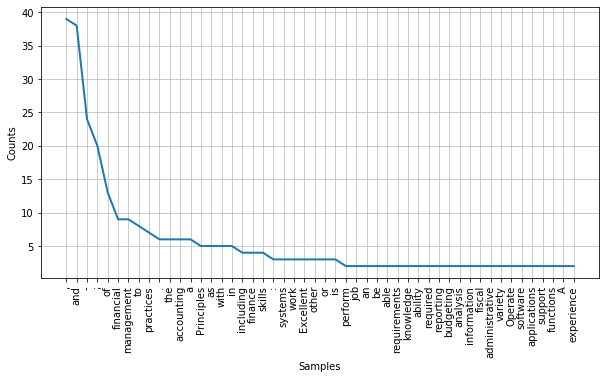

In [26]:
plt.figure(figsize=(10, 5))
fd = nltk.FreqDist(tokens)  # case sensitive!
fd.most_common(50)
fd.plot(50)

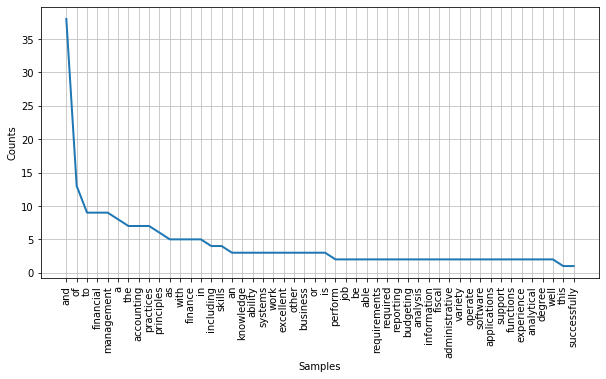

In [27]:
# Remove punctuations, convert all to lower-case, and try again
tokens_nop = [t for t in tokens if t not in string.punctuation]
tokens_nop = [t.lower() for t in tokens_nop]
plt.figure(figsize=(10, 5))
fd = nltk.FreqDist(tokens_nop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

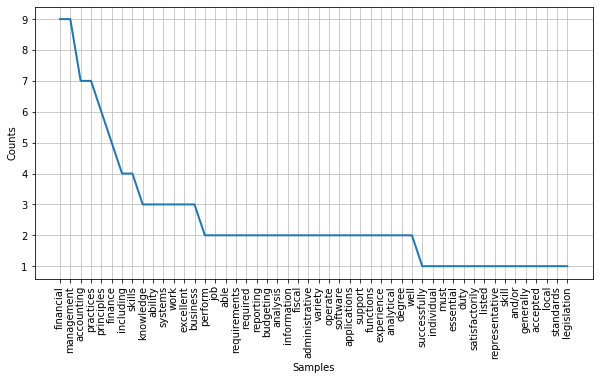

In [28]:
# Remove stopwords, and try again
stop = stopwords.words('english')
tokens_nostop = [t for t in tokens_nop if t not in stop]
plt.figure(figsize=(10, 5))
fd = nltk.FreqDist(tokens_nostop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

In [24]:
print((df.iloc[0])['Title'])

Chief Financial Officer


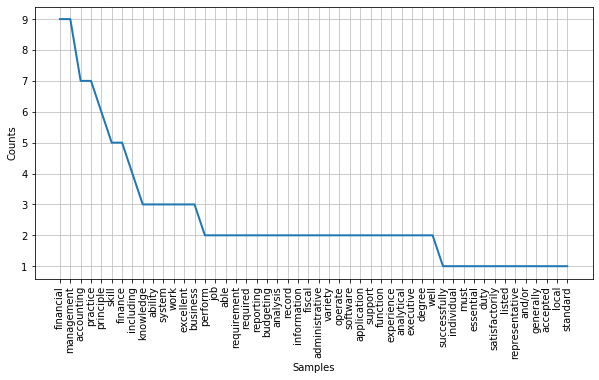

In [29]:
wnl = nltk.WordNetLemmatizer()
tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
plt.figure(figsize=(10, 5))
fd = nltk.FreqDist(tokens_lem)  # case sensitive!
fd.most_common(50)
fd.plot(50)

In [30]:
tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
text_clean = " ".join(tokens_clean)

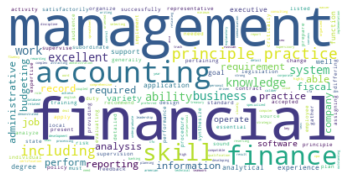

In [31]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Create a Preprocessing Function for All Rows

In [35]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_clean

def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(10, 5))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)

In [36]:
tokens_clean = preprocess((df.iloc[4])['RequiredQual_token']) # we know this is a software job
print(tokens_clean)

['university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'window', '2000', 'server', 'networking', 'tcp/', 'technology', 'sql', '2000', 'server', 'visual', 'basic', 'least', 'year', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norm', 'accepted', 'company']


university degree economical background plus excellent knowledge window 2000 server networking tcp/ technology sql 2000 server visual basic least year experience database software development good knowledge english remuneration commensurate norm accepted company


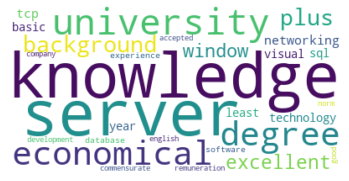

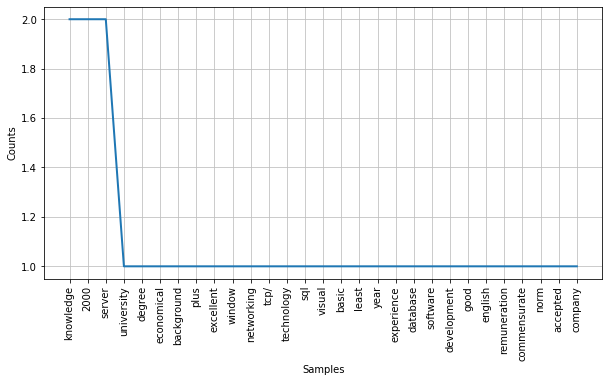

In [37]:
plotWC(tokens_clean)

In [39]:
def get_year_from_date_if_exists(date_str):
    year_str = date_str.strip()[-4:]
    for c in year_str:
        if c.isalpha():
            return "0"
    
    return year_str

df["year"] = df["date"].apply(get_year_from_date_if_exists)
df["year"].head()

0    2004
1    2004
2    2004
3    2004
4    2004
Name: year, dtype: object

In [40]:
df = df[df["year"] != "0"]

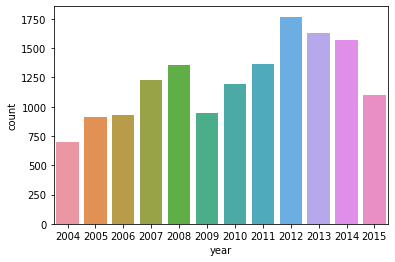

In [41]:
import seaborn as sns
ax = sns.countplot(x="year", data=df)
ax

In [42]:
def set_group_by_year(year):
    year = int(year)
    if year >= 2004 and year <= 2007:
        return 1
    elif year >= 2008 and year <= 2011:
        return 2
    else:
        return 3
    
df["year_group"] = df["year"].apply(set_group_by_year)

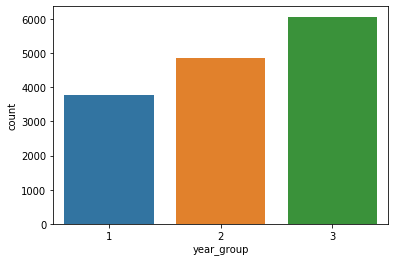

In [44]:
ax = sns.countplot(x="year_group", data=df)
ax